<a href="https://colab.research.google.com/github/MaryM12/Statistics_and_R_IB/blob/olymp_games_project/olympic_games_project/report/R_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [397]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt  
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation

In [398]:
def multi_reader(path_to_folder):
    path = str(path_to_folder)
    csv_files = glob.glob(path + "/*.csv")
    # read each csv file, producing a list of dfs
    dfs = (pd.read_csv(file) for file in csv_files)
    # concatenate all dataframes
    multi_df = pd.concat(dfs, ignore_index=True)
    return multi_df

In [399]:
# df = multi_reader("/content/athlete")

In [400]:
!gdown 1jyR3muSlXMnEcSK8hx1MPVAphdMYVf_M
df = pd.read_csv("/content/df.csv")
# an alternative way to download the processed data

In [401]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271110,124512,Paulien Ilse Maria van Deutekom,F,25.0,171.0,72.0,Netherlands,NED,2006 Winter,2006.0,Winter,Torino,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),NaN
271111,124513,Juan Pierre van Deventer,M,25.0,184.0,70.0,South Africa,RSA,2008 Summer,2008.0,Summer,Beijing,Athletics,"Athletics Men's 1,500 metres",NaN
271112,124514,Germaine Van Dievoet (-Dessecker),F,20.0,NaN,NaN,Belgium,BEL,1920 Summer,1920.0,Summer,Antwerpen,Swimming,Swimming Women's 100 metres Freestyle,NaN
271113,124515,Raymond Van Dijck,M,25.0,181.0,73.0,Belgium,BEL,1960 Summer,1960.0,Summer,Roma,Athletics,Athletics Men's Pole Vault,NaN


# 2. 
Explore the data

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271115 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271115 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271113 non-null  object 
 3   Age     261639 non-null  float64
 4   Height  210943 non-null  float64
 5   Weight  208239 non-null  float64
 6   Team    271112 non-null  object 
 7   NOC     271111 non-null  object 
 8   Games   271110 non-null  object 
 9   Year    271108 non-null  float64
 10  Season  271108 non-null  object 
 11  City    271108 non-null  object 
 12  Sport   271108 non-null  object 
 13  Event   271107 non-null  object 
 14  Medal   39782 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 31.0+ MB


In [403]:
df.describe()

,ID,Age,Height,Weight,Year
count,271115.000000,261639.000000,210943.000000,208239.000000,271108.000000
mean,68248.828641,25.557669,175.339760,70.702232,1978.378314
std,39022.303374,6.407296,10.524619,14.348878,29.877579
min,1.000000,10.000000,127.000000,7.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,240.000000,340.000000,214.000000,2016.000000


It seems like outliers are present in the data. Basically, there're several methods to identify outliers, such as:
- Visualization
- Skewness
- Interquartile Range
- Standard Deviation

Here, I will simply trim the outliers (as we have a lot of observations anyway). Other ways to treat oultliers include
- Flooring and Capping (i.e. replacing with a lower or higher quantile)
- Trimming
- Replacing outliers with the mean (!with caution), median, mode, or other values

(used https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893 for more info)

In [404]:
# I decided to use quantiles 0.1 and 0.9 here for a less stringent trimming and based on the web sources
Q1 = df['Age'].quantile(0.1)
Q3 = df['Age'].quantile(0.9)
IQR = Q3 - Q1
IQR

whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Age'][(df['Age']>upper_whisker)|(df['Age']<lower_whisker)].index
df.drop(index,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


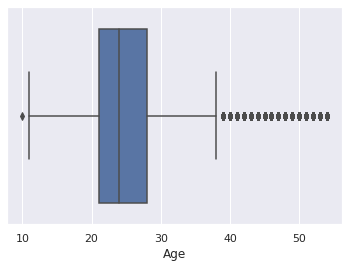

In [405]:
sns.boxplot(df['Age'],data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


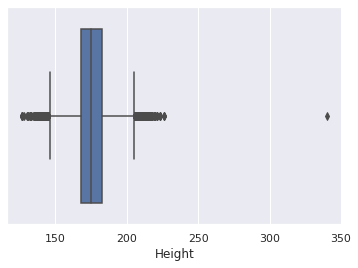

In [406]:
sns.boxplot(df['Height'],data=df);

In [407]:
index=df['Height'][(df['Height']>270)].index
df.drop(index,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


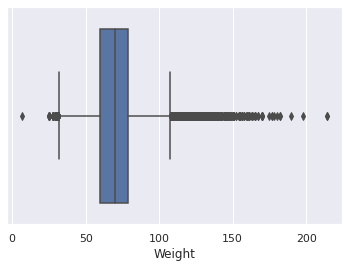

In [408]:
sns.boxplot(df['Weight'],data=df);  #ok

In [409]:
index=df['Weight'][(df['Weight']<20)].index
df.drop(index,inplace=True)

In [410]:
df["Sex"].value_counts()

M    195561
F     74414
G         2
Name: Sex, dtype: int64

In [411]:
df[(df['Sex']== "G")]
# Not that I'm intolerant, but ok, let's consider them males for now, based on their names
df['Sex'].replace("G","M",regex=True, inplace=True)

In [412]:
df["Games"].value_counts()
df["Medal"].value_counts()

Gold      13344
Bronze    13266
Silver    13071
Name: Medal, dtype: int64

In [413]:
df["Sport"].value_counts()

Athletics        38623
Gymnastics       26706
Swimming         23193
Shooting         11292
Cycling          10859
                 ...  
Jeu De Paume        11
Basque Pelota        2
Roque                2
Footba               1
Aeronautics          1
Name: Sport, Length: 67, dtype: int64

In [414]:
df["Season"].value_counts()

Summer    221412
Winter     48561
Name: Season, dtype: int64

In [415]:
df.shape
# (269980, 15) after trimming

(269979, 15)

# 3
 Age of the yougest male and female sportsmen in 1992 (2 points)
 


In [416]:
ages = df['Age'][df['Year'] == 1992.0].values
q3 = ages[~(np.isnan(ages))].min()

print('The youngest sportsman is', q3, 'years old.')
ages_m = df['Age'][(df['Year'] == 1992.0) & (df['Sex'] == "M")].values
q3_1 = ages_m[~(np.isnan(ages_m))].min()
print('Among males, the youngest boy is', q3_1, 'years old.')
ages_f = df['Age'][(df['Year'] == 1992.0) & (df['Sex'] == "F")].values
q3_2 = ages_f[~(np.isnan(ages_f))].min()
print('Among females, the youngest girl is', q3_2, 'years old.')

The youngest sportsman is 11.0 years old.
Among males, the youngest boy is 11.0 years old.
Among females, the youngest girl is 12.0 years old.


# 4. 
Mean and std of Height for males in females (2 points)


In [417]:
q4 = df.groupby('Sex')['Height'].agg(['mean', 'std'])      

In [418]:
print('For males, the mean height is', round(q4.iloc[1, 0], 3))
print('For females, the mean height is', round(q4.iloc[0, 0], 3))
print('For males, std = ', round(q4.iloc[1, 1], 3))
print('For females, std = ', round(q4.iloc[0, 1], 3))

For males, the mean height is 178.861
For females, the mean height is 167.841
For males, std =  9.361
For females, std =  8.779


# 5. 
Mean and std of Height for female tennis players (sex = F) in 2000 (2 points)


In [419]:
df["Sport"].unique()

array(['Athletics', 'Cycling', 'Swimming', 'Fencing', 'Speed Skating',
       'Badminton', 'Sailing', 'Rowing', 'Volleyball', 'Boxing',
       'Archery', 'Alpine Skiing', 'Shooting',
       'Short Track Speed Skating', 'Hockey', 'Equestrianism', 'Baseball',
       'Water Polo', 'Art Competitions', 'Football', 'Wrestling',
       'Canoeing', 'Judo', 'Snowboarding', 'Modern Pentathlon',
       'Gymnastics', 'Beach Volleyball', 'Basketball', 'Ice Hockey',
       'Weightlifting', 'Bobsleigh', 'Softball', 'Diving', 'Tug-Of-War',
       'Figure Skating', 'Tennis', 'Nordic Combined', 'Triathlon',
       'Handball', 'Golf', 'Cross Country Skiing', 'Military Ski Patrol',
       'Table Tennis', 'Freestyle Skiing', 'Ski Jumping', 'Biathlon',
       'Rugby', 'Synchronized Swimming', 'Taekwondo',
       'Rhythmic Gymnastics', 'Luge', 'Skeleton', 'Lacrosse',
       'Rugby Sevens', 'Curling', 'Croquet', 'Trampolining',
       'Basque Pelota', 'Alpinism', 'Polo', 'Motorboating', 'Cricket',
       'Rac

In [420]:
# I'll count it for just Tennis, not Table tennis
q5 = df['Height'][(df['Sex'] == 'F') & (df['Year'] == 2000.0) & (df["Sport"] == 'Tennis')].agg(['mean', 'std'])   
q5


mean    171.792000
std       6.458673
Name: Height, dtype: float64

In [421]:
print('Mean height = ', round(q5[0], 1))
print('Std = ', round(q5[1], 1))

Mean height =  171.8
Std =  6.5


# 6. 
Which kind of sport did the heaviest athlete partake in in 2006? (2 points)

In [422]:
df['Weight'][df['Year'] == 2006.0].max() #127.0
q6 = df['Sport'][(df['Weight'] == 127.0) & (df['Year'] == 2006.0)]
q6
print('The most heavyset person in 2006 took part in', q6.iloc[0])


The most heavyset person in 2006 took part in Skeleton


# 7. 
Golden medals won by women in 1980-2010 (2 points)


In [424]:
q7 = df.query('(Sex == "F") &  (1980<= Year <= 2010) &  (Medal == "Gold")')
print(f'{len(q7)} golden medals were won by women in 1980-2010.')

2249 golden medals were won by women in 1980-2010.


# 8. 
How many times did John Aalberg partake in the Games? (2 points)

In [425]:
q8 = df.query('(Name == "John Aalberg")')
q8_1 = df['Year'][df['Name'] == "John Aalberg"].unique()
q8_2 = len(df.query('(Name == "John Aalberg") & (Year == 1992.0)'))
q8_3 = len(df.query('(Name == "John Aalberg") & (Year == 1994.0)'))

print(f'John Aalberg participated in Games in {len(q8_1)} different years: {q8_2} times in {q8_1[0]} and {q8_3} times in {q8_1[1]}')


John Aalberg participated in Games in 2 different years: 4 times in 1992.0 and 4 times in 1994.0


# 9. 
The most an the least represented age groups amoung the following: [15-25), [25-35), [35-45), [45-55]. (4 points)


In [426]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,NaN


In [427]:
q9_1 = df.query('(Year == 2008) &  (15<= Age < 25)')
q9_2 = df.query('(Year == 2008) &  (25<= Age < 35)')
q9_3 = df.query('(Year == 2008) &  (35<= Age < 45)')
q9_4 = df.query('(Year == 2008) &  (45<= Age <= 55)')


In [428]:
d = {}
keys = [q9_1, q9_2, q9_3, q9_4]
for i in range(len(keys)):
  d[i+1] = len(keys[i])
print(d)
print("The least represented age group among the groups [15-25), [25-35), [35-45), [45-55] is group number", min(d, key=d.get))
print("The most represented age group among the groups [15-25), [25-35), [35-45), [45-55] is group number", max(d, key=d.get))

{1: 6294, 2: 6367, 3: 790, 4: 116}
The least represented age group among the groups [15-25), [25-35), [35-45), [45-55] is group number 4
The most represented age group among the groups [15-25), [25-35), [35-45), [45-55] is group number 2


## 10. 
the number of sports in 2002 as compared to 1994 (2 points)


In [429]:
q10_1 = df['Sport'][df['Year'] == 2002].unique()
q10_2 = df['Sport'][df['Year'] == 1994].unique()
delta = len(q10_1) - len(q10_2)
if delta > 0:
  print("The number of sports increased by", delta)
elif delta < 0:
  print("The number of sports decreased by", abs(delta))


The number of sports increased by 3


## 11. 
top3 countries for every medal type in each season (2 points)


In [447]:
seasons = ["Summer", "Winter"]
medals = ["Gold", "Silver", "Bronze"]
for season in seasons:
  for medal in medals:
    q11_1 = df['NOC'][(df['Season'] == season) & (df['Medal'] == medal)].value_counts()[:3].index
    print("Top 3 countries in", season, "with", medal, "medal are", *q11_1)


Top 3 countries in Summer with Gold medal are USA URS GBR
Top 3 countries in Summer with Silver medal are USA GBR URS
Top 3 countries in Summer with Bronze medal are USA GER GBR
Top 3 countries in Winter with Gold medal are CAN URS USA
Top 3 countries in Winter with Silver medal are USA CAN NOR
Top 3 countries in Winter with Bronze medal are FIN SWE USA


# 12. 
standardize height values (2 points)

In [431]:
Height_z_scores = (df["Height"] - df["Height"].mean()) / df["Height"].std()

In [432]:
Height_z_scores

0         0.918301
1         0.918301
2         0.918301
3              NaN
4         0.062796
            ...   
271110   -0.412485
271111    0.823245
271112         NaN
271113    0.538077
271114         NaN
Name: Height, Length: 269979, dtype: float64

# 13. 
min-max normalizatioin of height (2 points)

In [433]:
Height_min_max_scaled = (df["Height"] - df["Height"].min()) / (df["Height"].max() - df["Height"].min())

In [434]:
Height_min_max_scaled

0         0.585859
1         0.585859
2         0.585859
3              NaN
4         0.494949
            ...   
271110    0.444444
271111    0.575758
271112         NaN
271113    0.545455
271114         NaN
Name: Height, Length: 269979, dtype: float64

# 14. 
compare height, weight, and age between males and females (5 points)


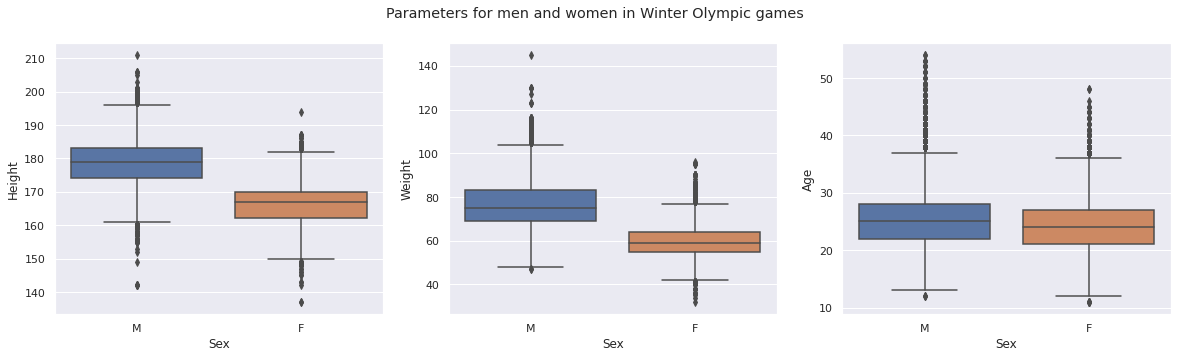

In [435]:
data_subset = df[(df['Season'] == "Winter")]
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('Parameters for men and women in Winter Olympic games');

sns.boxplot(ax=axes[0], data=data_subset, x="Sex", y='Height');
sns.boxplot(ax=axes[1], data=data_subset, x="Sex", y='Weight')
sns.boxplot(ax=axes[2], data=data_subset, x="Sex", y='Age');



Perform mannwhitney test and check p-values manually



In [436]:
male_h = data_subset.loc[(data_subset.Sex == "M"), "Height"].dropna().values
female_h = data_subset.loc[(data_subset.Sex == "F"), "Height"].dropna().values
male_w = data_subset.loc[(data_subset.Sex == "M"), "Weight"].dropna().values
female_w = data_subset.loc[(data_subset.Sex == "F"), "Weight"].dropna().values
male_a = data_subset.loc[(data_subset.Sex == "M"), "Age"].dropna().values
female_a = data_subset.loc[(data_subset.Sex == "F"), "Age"].dropna().values

In [437]:
stat_results = [
  mannwhitneyu(male_h, female_h, alternative="two-sided"),
  mannwhitneyu(male_w, female_w, alternative="two-sided"),
  mannwhitneyu(male_a, female_a, alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]

print("male_h vs female_h: \n", stat_results[0], "\n")
print("male_w vs female_w: \n", stat_results[1], "\n")
print("male_a vs female_a: \n", stat_results[2], "\n")

male_h vs female_h: 
 MannwhitneyuResult(statistic=329593449.0, pvalue=0.0) 

male_w vs female_w: 
 MannwhitneyuResult(statistic=319874076.0, pvalue=0.0) 

male_a vs female_a: 
 MannwhitneyuResult(statistic=294428703.0, pvalue=6.161336398147834e-214) 



In [438]:
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

formatted_pvalues

['p=0.00e+00', 'p=0.00e+00', 'p=6.16e-214']

In [439]:
!pip install statannot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Final plots with p-values

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.296e+08
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=3.199e+08
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. F: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.161e-214 U_stat=2.944e+08


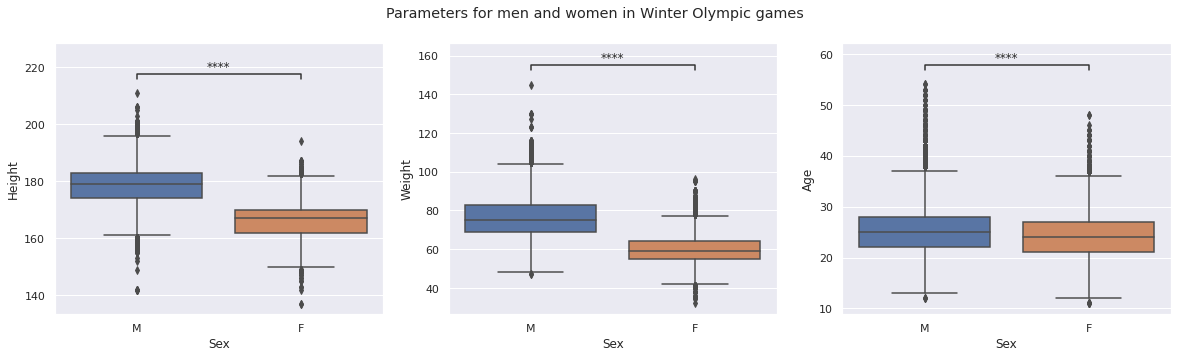

In [440]:
data_subset = df[(df['Season'] == "Winter")]
fig, axes = plt.subplots(1, 3, figsize=(20, 5));

fig.suptitle('Parameters for men and women in Winter Olympic games');
ax = sns.boxplot(ax=axes[0],data=data_subset, x="Sex", y="Height");
add_stat_annotation(ax, data=data_subset, x="Sex", y="Height",
                                   box_pairs=[("F", "M")],
                                   test='Mann-Whitney', text_format='star',
                                   verbose=2);
ax1 = sns.boxplot(ax=axes[1],data=data_subset, x="Sex", y="Weight");
add_stat_annotation(ax1, data=data_subset, x="Sex", y="Weight",
                                   box_pairs=[("F", "M")],
                                   test='Mann-Whitney', text_format='star',
                                   verbose=2);
ax2 = sns.boxplot(ax=axes[2],data=data_subset, x="Sex", y="Age");
add_stat_annotation(ax2, data=data_subset, x="Sex", y="Age",
                                   box_pairs=[("F", "M")],
                                   test='Mann-Whitney', text_format='star',
                                   verbose=2);
# test_results;

## 15. 
Team and Medal interrelation (5 points)

In [441]:
df["Team"][df['Medal'] == "Gold"].value_counts()

United States    2471
Soviet Union     1058
Germany           678
Italy             534
Great Britain     514
                 ... 
Peru                1
Israel              1
Baby-1              1
Femur-1             1
Camille             1
Name: Team, Length: 242, dtype: int64

In [442]:
df["Team"][df['Medal'] == "Silver"].value_counts()

United States           1502
Soviet Union             716
Germany                  626
Great Britain            578
France                   513
                        ... 
United Arab Republic       1
Ecuador                    1
Costa Rica                 1
Ghana                      1
Cote d'Ivoire              1
Name: Team, Length: 273, dtype: int64

In [443]:
df["Team"][df['Medal'] == "Bronze"].value_counts()

United States           1229
Soviet Union             677
Germany                  676
France                   573
Great Britain            572
                        ... 
Zimbabwe                   1
Mignon-3                   1
United Arab Republic       1
Cote d'Ivoire              1
Formosa                    1
Name: Team, Length: 268, dtype: int64

Yes, we can hypothesize they are interrelated, as top countries are more or less the same for all the medal types

# 16. 
test several hypotheses (10 points)

1. In task 16, we have already compared height, weight and age in men in women who partook in Winter Games and tested 3 hypotheses with Mann-Whitney test:
* 1) H0: the distribution of height in men is the same as in women;
* 2) H0: the distribution of weight in men is the same as in women;
* 3) H0: the distribution of age in men is the same as in women

In every case, the test showed that the parameters are not equal between men and women.


2. Let's check if Weight and Height correlate

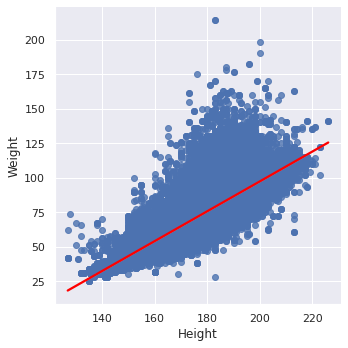

In [444]:
# Plot sepal width as a function of sepal_length across days
sns.lmplot(
    data=df,
    x="Height", y="Weight",
    height=5, line_kws={'color': 'red'}
);


In [445]:
# I'll use spearman correlation, so there's no need to check if the values follow normal distribution
table = df[["Height", "Weight"]]
table.corr(method='spearman', min_periods=1)


,Height,Weight
Height,1.000000,0.827279
Weight,0.827279,1.000000


A coefficient of 0.82727 indicates a strong positive correlation.